# Problem Set 3
Tyler Amos


# Task 1 and Imports

In [4]:
# from https://livebook.manning.com/#!/book/deep-learning-with-python/chapter-2/41

from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
from keras import models
from keras import layers
import pandas as pd
import random
random.seed(1234)

import matplotlib.pyplot as plt


# Task 2 - Preprocess Data

In [5]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Validation set is selected within the model
# training (see below) with this fraction
valid_frac = 10000/60000

# Task 3

# Task 3.i - Initial Model

In [6]:
network_i = models.Sequential()

# Four dense,fully connected layers
network_i.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network_i.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network_i.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network_i.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))

# Fifth layer using softmax
network_i.add(layers.Dense(10, activation='softmax'))
network_i.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
history_training_i = network_i.fit(train_images, train_labels, 
                                   validation_split = valid_frac,
                                   epochs=200, verbose = 0, 
                                   batch_size=512)
test_loss, test_acc = network_i.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

10000/10000 [==============================] - 1s 70us/step
test_acc: 0.9801


In [9]:
# save to csv for later
pd.DataFrame(history_training_i.history).to_csv('q3_i_results.csv')

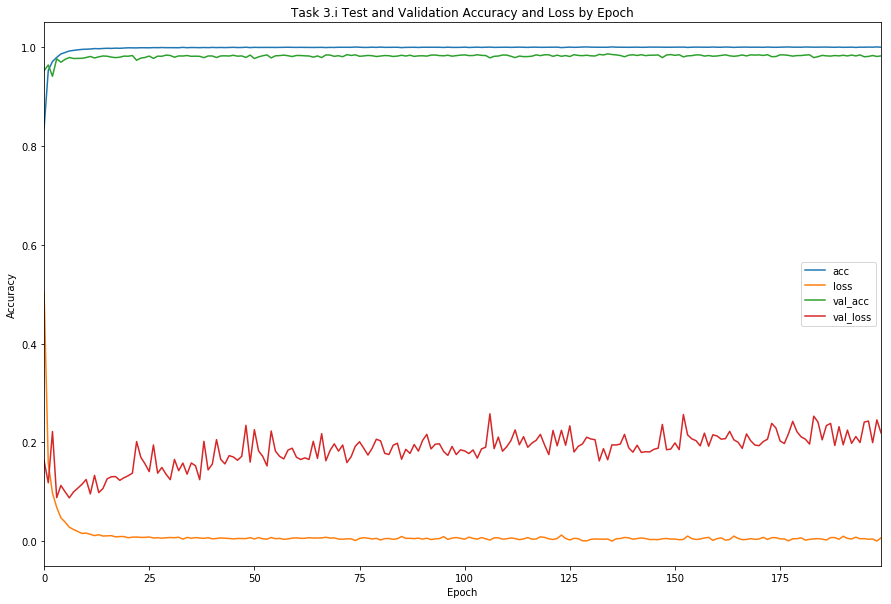

In [7]:
df = pd.DataFrame(history_training_i.history)
df.plot(figsize = (15,10))
plt.title("Task 3.i Test and Validation Accuracy and Loss by Epoch")
plt.ylabel("Accuracy")
plt.xlabel("Epoch");


In [24]:
best_model = 0 # for now, need to figure way to identify

print("At epoch {} the model's performance degrades based on the validation set.".format(best_model))

At epoch 0 the model's performance degrades based on the validation set.


# Task 3.ii - Dropout

In [8]:
network_ii = models.Sequential()


# dropout ref: https://machinelearningmastery.com/dropout-regularization-deep-learning-models-keras/

# Four dense,fully connected layers
network_ii.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network_ii.add(layers.Dropout(0.5))
network_ii.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network_ii.add(layers.Dropout(0.5))
network_ii.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network_ii.add(layers.Dropout(0.5))
network_ii.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network_ii.add(layers.Dropout(0.5))
# Fifth layer using softmax
network_ii.add(layers.Dense(10, activation='softmax'))

network_ii.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
history_training_ii = network_ii.fit(train_images, train_labels,
                                     validation_split = valid_frac,
                                     verbose = 0, 
                                     epochs=200, batch_size=512)
test_loss, test_acc = network_ii.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

10000/10000 [==============================] - 1s 90us/step
test_acc: 0.984


In [11]:
# save to csv for later
pd.DataFrame(history_training_ii.history).to_csv('q3_ii_results.csv')
# here at 133 on tuesday

In [3]:
df = pd.DataFrame(history_training_i.history)
df_2 = pd.DataFrame(history_training_ii.history)
df.columns = ['accuracy (i)', 'loss (i)']
df['accuracy (ii)']  = df_2['acc']
df['loss (ii)'] = df_2['loss']
df.plot()
plt.title("Task 3.i and 3.ii Accuracy (acc) and Loss by Epoch")
plt.ylabel("Accuracy")
plt.xlabel("Epoch");

NameError: name 'history_training_i' is not defined

Something about how they compare....

# Task 3.iii, a) - L1 Regularization

In [44]:
from keras import regularizers
network_iii_a = models.Sequential()

# Four dense,fully connected layers
network_iii_a.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,), kernel_regularizer = regularizers.l1(0.001)))
network_iii_a.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,), kernel_regularizer = regularizers.l1(0.001)))
network_iii_a.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,), kernel_regularizer = regularizers.l1(0.001)))
network_iii_a.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,), kernel_regularizer = regularizers.l1(0.001)))

# Fifth layer using softmax
network_iii_a.add(layers.Dense(10, activation='softmax'))
network_iii_a.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
history_training_iii_a = network_iii_a.fit(train_images, train_labels, epochs=10, batch_size=512)
test_loss, test_acc = network_iii_a.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

Epoch 1/10
60000/60000 [==============================] - 16s 268us/step - loss: 15.4783 - acc: 0.3112
Epoch 2/10
60000/60000 [==============================] - 16s 261us/step - loss: 5.0256 - acc: 0.5151
Epoch 3/10
60000/60000 [==============================] - 16s 265us/step - loss: 3.6630 - acc: 0.6109
Epoch 4/10
60000/60000 [==============================] - 17s 292us/step - loss: 3.0721 - acc: 0.6616
Epoch 5/10
60000/60000 [==============================] - 19s 309us/step - loss: 2.7072 - acc: 0.7021
Epoch 6/10
60000/60000 [==============================] - 16s 274us/step - loss: 2.4720 - acc: 0.7300
Epoch 7/10
60000/60000 [==============================] - 17s 286us/step - loss: 2.3180 - acc: 0.7493
Epoch 8/10
60000/60000 [==============================] - 19s 311us/step - loss: 2.2113 - acc: 0.7621
Epoch 9/10
60000/60000 [==============================] - 18s 298us/step - loss: 2.1430 - acc: 0.7667
Epoch 10/10
10000/10000 [==============================] - 2s 250us/step
test_acc

In [45]:
# remember to check the type of regularizer
from keras import regularizers
network_iii_b = models.Sequential()

# Four dense,fully connected layers
network_iii_b.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,), kernel_regularizer = regularizers.l2(0.001)))
network_iii_b.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,), kernel_regularizer = regularizers.l2(0.001)))
network_iii_b.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,), kernel_regularizer = regularizers.l2(0.001)))
network_iii_b.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,), kernel_regularizer = regularizers.l2(0.001)))

# Fifth layer using softmax
network_iii_b.add(layers.Dense(10, activation='softmax'))
network_iii_b.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
history_training_iii_b = network_iii_b.fit(train_images, train_labels, epochs=10, batch_size=512)
test_loss, test_acc = network_iii_b.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

Epoch 1/10
60000/60000 [==============================] - 19s 310us/step - loss: 5.1063 - acc: 0.2195
Epoch 2/10
60000/60000 [==============================] - 18s 301us/step - loss: 3.2533 - acc: 0.2638
Epoch 3/10
60000/60000 [==============================] - 17s 275us/step - loss: 2.3950 - acc: 0.3681
Epoch 4/10
60000/60000 [==============================] - 17s 285us/step - loss: 2.1243 - acc: 0.4384
Epoch 5/10
60000/60000 [==============================] - 17s 278us/step - loss: 1.9418 - acc: 0.4971
Epoch 6/10
60000/60000 [==============================] - 17s 288us/step - loss: 1.7915 - acc: 0.5462
Epoch 7/10
60000/60000 [==============================] - 18s 296us/step - loss: 1.6474 - acc: 0.5917
Epoch 8/10
60000/60000 [==============================] - 18s 302us/step - loss: 1.5427 - acc: 0.6381
Epoch 9/10
60000/60000 [==============================] - 17s 279us/step - loss: 1.4908 - acc: 0.6592
Epoch 10/10
10000/10000 [==============================] - 3s 346us/step
test_acc:

In [ ]:
# save to csv for later
pd.DataFrame(history_training_iii_a.history).to_csv('q3_iii_a_results.csv')
pd.DataFrame(history_training_iii_b.history).to_csv('q3_iii_b_results.csv')

In [ ]:
# plot initial vs dropout vs l1 vs l2 regularized models

df = pd.DataFrame(history_training_i.history)
df_2 = pd.DataFrame(history_training_ii.history)
df_3 = pd.DataFrame(history_training_iii_a.history)
df_4 = pd.DataFrame(history_training_iii_b.history)
df.columns = ['accuracy (i)', 'loss (i)']
df['accuracy (ii)']  = df_2['acc']
df['loss (ii)'] = df_2['loss']
df.plot()
plt.title("Task 3.i and 3.ii Accuracy (acc) and Loss by Epoch")
plt.ylabel("Accuracy")
plt.xlabel("Epoch");

Say something about which performs best

# Task 3.iv - The Best Model

In [ ]:
# take best peforming model on validation set and retrain on whole training data
# compare to baseline model 

# Task 4 - Boston Housing

In [46]:
from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57344/57026 [==============================] - ETA:  - 0s 1us/step
